<h1>Data Storytelling - Diabetes</h1>

In this project I am looking for correlations between the independent variables and the target variable, a positive diagnosis of diabetes, using graphs and plots.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import normalize

In [2]:
diabetes = pd.read_csv('train.csv')

In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   p_id                   614 non-null    int64  
 1   no_times_pregnant      614 non-null    int64  
 2   glucose_concentration  614 non-null    int64  
 3   blood_pressure         614 non-null    int64  
 4   skin_fold_thickness    614 non-null    int64  
 5   serum_insulin          614 non-null    int64  
 6   bmi                    614 non-null    float64
 7   diabetes pedigree      614 non-null    float64
 8   age                    614 non-null    int64  
 9   diabetes               614 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 48.1 KB


In [4]:
diabetes.head()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2,112,68,22,94,34.1,0.315,26,0
1,25,11,143,94,33,146,36.6,0.254,51,1
2,710,2,93,64,32,160,38.0,0.674,23,1
3,658,1,120,80,48,200,38.9,1.162,41,0
4,542,3,128,72,25,190,32.4,0.549,27,1


In [6]:
round(diabetes.describe(), 2)

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
count,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00
mean,385.77,3.85,120.54,68.77,20.24,79.36,31.91,0.47,33.33,0.35
std,223.60,3.36,31.25,19.91,15.89,117.71,8.01,0.33,11.93,0.48
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,191.25,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,387.00,3.00,117.00,72.00,23.00,17.00,32.00,0.36,29.00,0.00
75%,572.75,6.00,139.00,80.00,32.00,126.00,36.60,0.61,41.00,1.00
max,768.00,17.00,197.00,114.00,63.00,846.00,59.40,2.42,81.00,1.00


In [7]:
diabetes.shape

(614, 10)

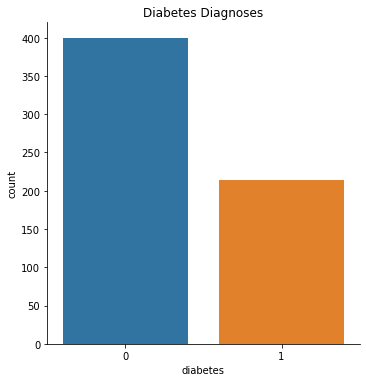

In [8]:
sns.catplot(x='diabetes', kind='count', data=diabetes)
plt.title('Diabetes Diagnoses')
plt.show()

In [9]:
round(diabetes.diabetes.value_counts(normalize=True), 4) * 100

0    65.15
1    34.85
Name: diabetes, dtype: float64

About two-thirds of patients in this list have a negative diagnosis of diabetes, while a little more than one-third are diagnosed with diabetes.

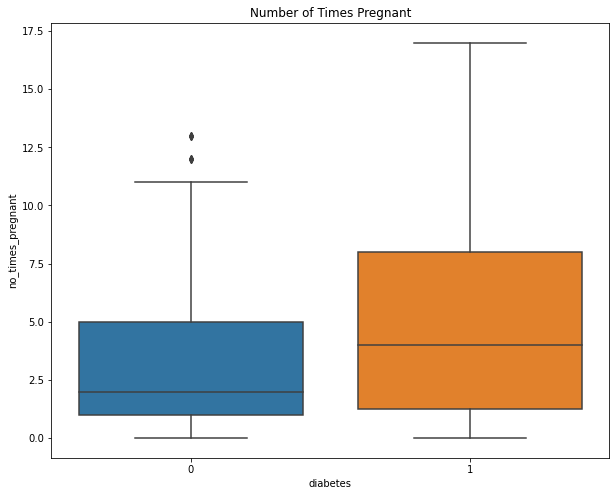

In [30]:
# What is the breakdown in positive and negative diagnoses by number of times pregnant?
plt.figure(figsize=(10, 8))
sns.boxplot(x='diabetes', y='no_times_pregnant', data=diabetes)
plt.title('Number of Times Pregnant')
plt.show()

In [46]:
# Pregnancy stats
diabetes.groupby('diabetes')['no_times_pregnant'].describe()

,count,mean,std,min,25%,50%,75%,max
diabetes,,,,,,,,
0,400.0,3.340000,3.013653,0.0,1.00,2.0,5.0,13.0
1,214.0,4.813084,3.744494,0.0,1.25,4.0,8.0,17.0


The patients with positive diagnoses have a greater range of number of times pregnant and a higher median number of pregnancies than patients with negative diagnoses.

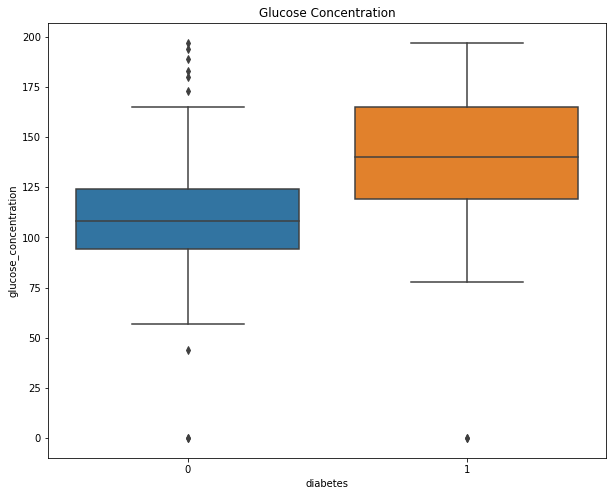

In [31]:
# What is the breakdown in positive and negative diagnoses by glucose concentration?
plt.figure(figsize=(10, 8))
sns.boxplot(x='diabetes', y='glucose_concentration', data=diabetes)
plt.title('Glucose Concentration')
plt.show()

In [47]:
# Glucose concentration stats
diabetes.groupby('diabetes')['glucose_concentration'].describe()

,count,mean,std,min,25%,50%,75%,max
diabetes,,,,,,,,
0,400.0,109.822500,25.025220,0.0,94.0,108.0,124.25,197.0
1,214.0,140.579439,31.915245,0.0,119.0,140.0,164.75,197.0


The patients with positive diagnoses have higher median glucose concentrations than patients with negative diagnoses.

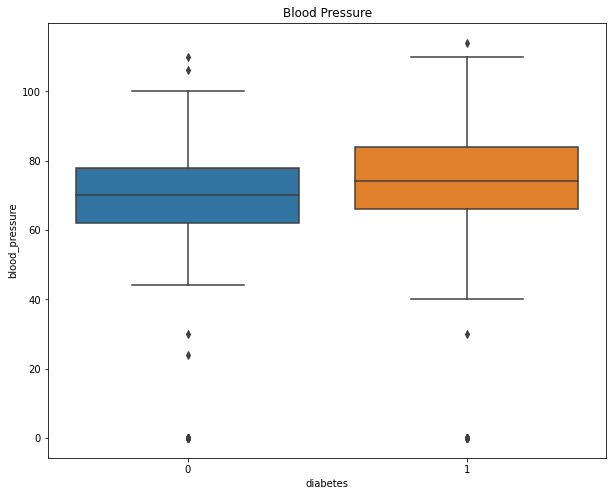

In [32]:
# What is the breakdown in positive and negative diagnoses by blood pressure?
plt.figure(figsize=(10, 8))
sns.boxplot(x='diabetes', y='blood_pressure', data=diabetes)
plt.title('Blood Pressure')
plt.show()

In [48]:
# Blood pressure stats
diabetes.groupby('diabetes')['blood_pressure'].describe()

,count,mean,std,min,25%,50%,75%,max
diabetes,,,,,,,,
0,400.0,67.717500,18.404470,0.0,62.0,70.0,78.0,110.0
1,214.0,70.724299,22.382162,0.0,66.0,74.0,84.0,114.0


The patients with positive diagnoses have slightly higher median blood pressure than patients with negative diagnoses.

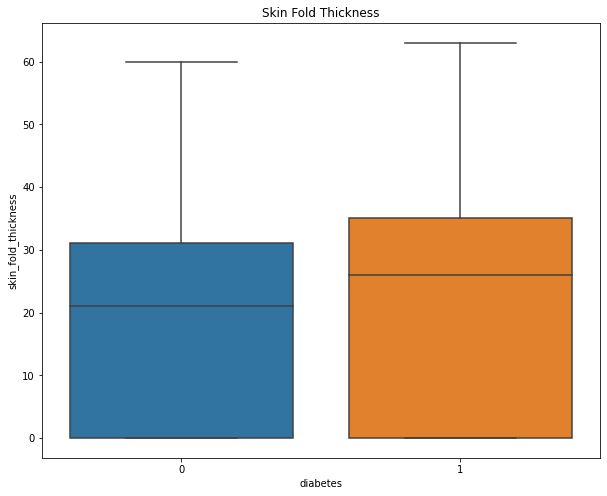

In [33]:
# What is the breakdown in positive and negative diagnoses by skin fold thickness?
plt.figure(figsize=(10, 8))
sns.boxplot(x='diabetes', y='skin_fold_thickness', data=diabetes)
plt.title('Skin Fold Thickness')
plt.show()

In [49]:
# Skin fold thickness stats
diabetes.groupby('diabetes')['skin_fold_thickness'].describe()

,count,mean,std,min,25%,50%,75%,max
diabetes,,,,,,,,
0,400.0,19.63250,15.200166,0.0,0.0,21.0,31.0,60.0
1,214.0,21.38785,17.072726,0.0,0.0,26.0,35.0,63.0


The patients with positive diagnoses have slightly higher skin fold thickness than patients with negative diagnoses.

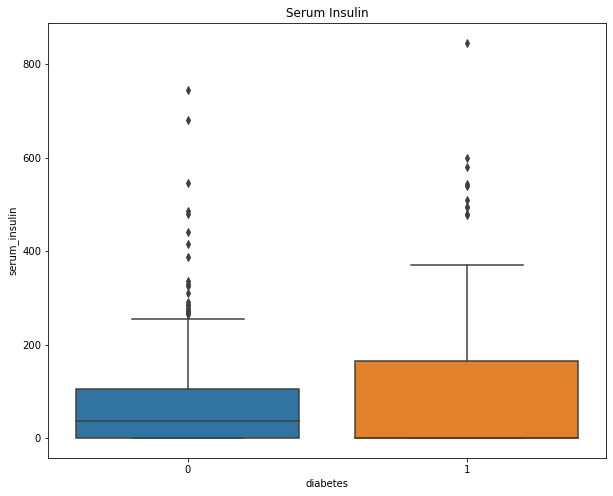

In [34]:
# What is the breakdown in positive and negative diagnoses by serum insulin?
plt.figure(figsize=(10, 8))
sns.boxplot(x='diabetes', y='serum_insulin', data=diabetes)
plt.title('Serum Insulin')
plt.show()

In [50]:
# Serum insulin stats
diabetes.groupby('diabetes')['serum_insulin'].describe()

,count,mean,std,min,25%,50%,75%,max
diabetes,,,,,,,,
0,400.0,69.327500,101.543873,0.0,0.0,36.0,105.0,744.0
1,214.0,98.098131,141.486922,0.0,0.0,0.0,165.0,846.0


The patients with positive diagnoses have higher median serum insulin than patients with negative diagnoses.

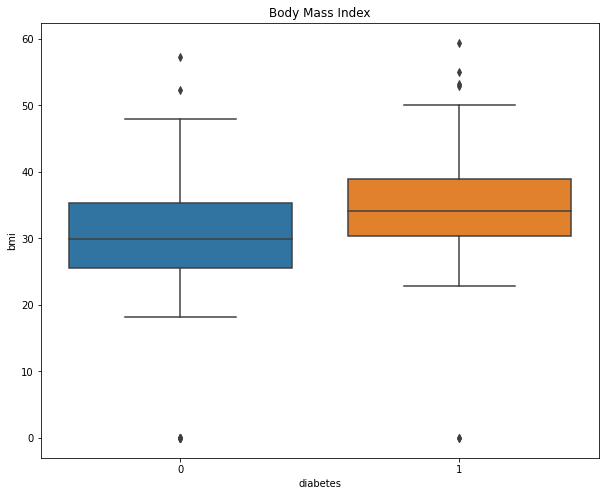

In [35]:
# What is the breakdown in positive and negative diagnoses by body mass index?
plt.figure(figsize=(10, 8))
sns.boxplot(x='diabetes', y='bmi', data=diabetes)
plt.title('Body Mass Index')
plt.show()

In [51]:
# Body mass index stats
diabetes.groupby('diabetes')['bmi'].describe()

,count,mean,std,min,25%,50%,75%,max
diabetes,,,,,,,,
0,400.0,30.299000,7.878790,0.0,25.575,29.85,35.300,57.3
1,214.0,34.921028,7.367348,0.0,30.425,34.05,38.925,59.4


The patients with positive diagnoses have higher median body mass indexes than patients with negative diagnoses.

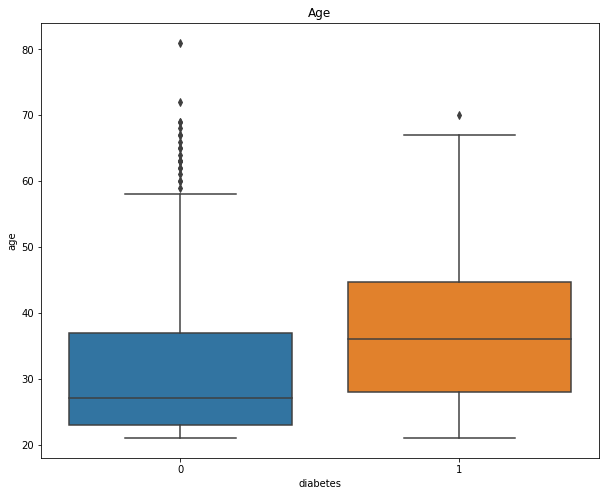

In [37]:
# What is the breakdown in positive and negative diagnoses by age?
plt.figure(figsize=(10, 8))
sns.boxplot(x='diabetes', y='age', data=diabetes)
plt.title('Age')
plt.show()

In [52]:
# Age stats
diabetes.groupby('diabetes')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
diabetes,,,,,,,,
0,400.0,31.392500,11.997637,21.0,23.0,27.0,37.00,81.0
1,214.0,36.939252,10.945063,21.0,28.0,36.0,44.75,70.0


The patients with positive diagnoses have a higher median age than patients with negative diagnoses.

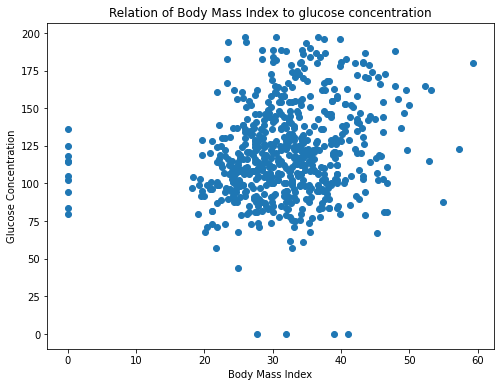

In [53]:
# Do patients with higher BMIs have higher glucose concentrations?
plt.figure(figsize=(8, 6))
plt.scatter('bmi', 'glucose_concentration', data=diabetes)
plt.xlabel('Body Mass Index')
plt.ylabel('Glucose Concentration')
plt.title('Relation of Body Mass Index to glucose concentration')
plt.show()

There is not much of a correlation between body mass index and glucose concentration.

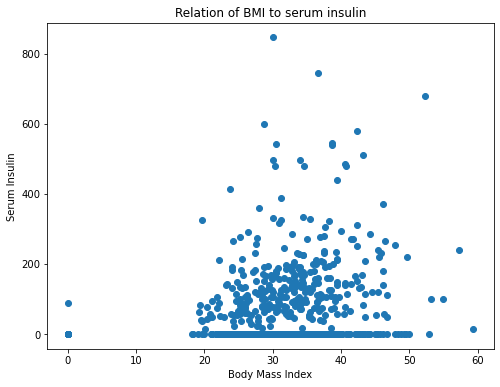

In [54]:
# Do patients with higher BMIs have higher serum insulin?
plt.figure(figsize=(8, 6))
plt.scatter('bmi', 'serum_insulin', data=diabetes)
plt.xlabel('Body Mass Index')
plt.ylabel('Serum Insulin')
plt.title('Relation of BMI to serum insulin')
plt.show()

There is not much of a correlation between body mass index and serum insulin.

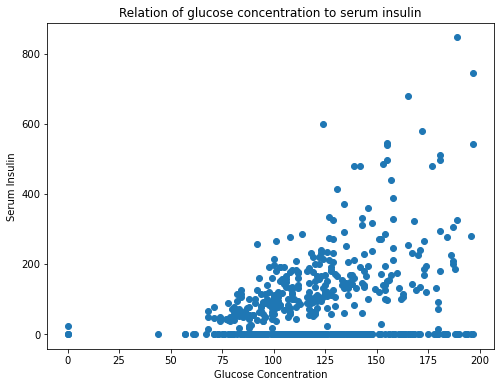

In [56]:
# Do patients with higher glucose concentrations have higher serum insulin?
plt.figure(figsize=(8, 6))
plt.scatter('glucose_concentration', 'serum_insulin', data=diabetes)
plt.xlabel('Glucose Concentration')
plt.ylabel('Serum Insulin')
plt.title('Relation of glucose concentration to serum insulin')
plt.show()

There is a positive correlation between body mass index and glucose concentration.